In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.io import push_notebook


In [14]:
df_global = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
df_global.head()


,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [15]:
countries = ['Brazil', 'Germany', 'United Kingdom', 'US', 'Italy', 'China']
df_regional = df_global[df_global['Country'].isin(countries)]

df_regional['Cases'] = df_regional[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
df_regional.head()


<ipython-input-15-0398e9b87c49>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Country,Confirmed,Recovered,Deaths,Cases
19584,2020-01-22,Brazil,0,0,0,0
19585,2020-01-23,Brazil,0,0,0,0
19586,2020-01-24,Brazil,0,0,0,0
19587,2020-01-25,Brazil,0,0,0,0
19588,2020-01-26,Brazil,0,0,0,0


In [16]:
df_regional = df_regional.pivot(index='Date', columns='Country', values='Cases')
countries = list(df_regional.columns)
df_regional.head()


Country,Brazil,China,Germany,Italy,US,United Kingdom
Date,,,,,,
2020-01-22,0,593,0,0,1,0
2020-01-23,0,691,0,0,1,0
2020-01-24,0,982,0,0,2,0
2020-01-25,0,1487,0,0,2,0
2020-01-26,0,2180,0,0,5,0


In [17]:
covid = df_regional.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries
covid.head()


,Brazil,China,Germany,Italy,US,United Kingdom
Date,,,,,,
2020-01-22,0,593,0,0,1,0
2020-01-23,0,691,0,0,1,0
2020-01-24,0,982,0,0,2,0
2020-01-25,0,1487,0,0,2,0
2020-01-26,0,2180,0,0,5,0


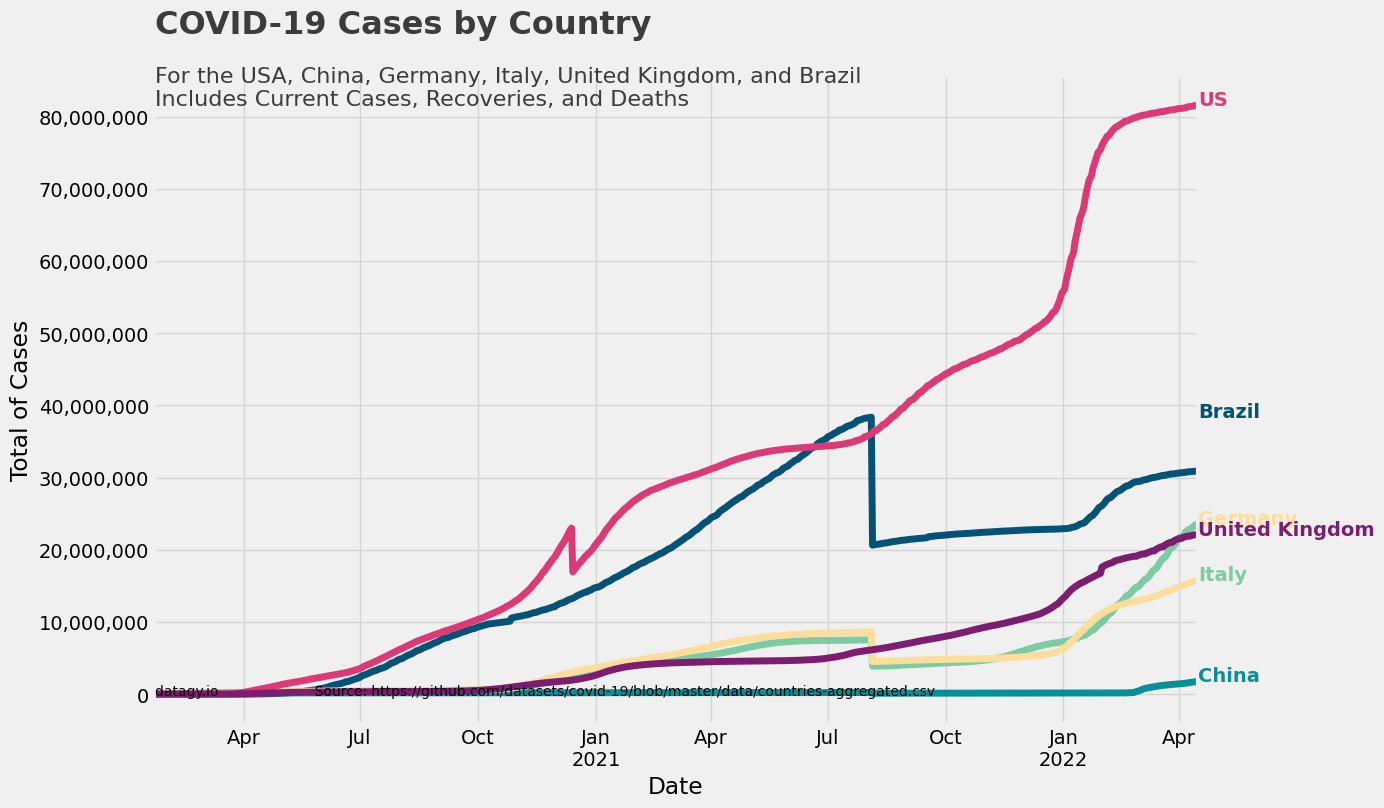

In [18]:
plt.style.use('fivethirtyeight')
colors = {'Brazil':'#045275', 'China':'#089099', 'Italy':'#7CCBA2', 'Germany':'#FCDE9C', 'US':'#DC3977', 'United Kingdom':'#7C1D6F'}

plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('Total of Cases')

for country in list(colors.keys()):
    plot.text(x=covid.index[-1], y=covid[country].max(), color=colors[country], s=country, weight='bold')

plot.text(x=covid.index[1], y=int(covid.max().max()) + 45000, s="COVID-19 Cases by Country\n\n", fontsize=23, weight='bold', alpha=.75)
plot.text(x=covid.index[1], y=int(covid.max().max()) + 15000, s="For the USA, China, Germany, Italy, United Kingdom, and Brazil\nIncludes Current Cases, Recoveries, and Deaths", fontsize=16, alpha=.75)
plot.text(x=covid.index[1], y=-100000, s='datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize=10)
plt.show()


In [19]:
fig = px.line(
    covid,
    title="COVID-19 Cases Over Time",
    labels={'value': 'Number of Cases', 'Date': 'Date'},
    template="plotly_white"
)
fig.update_layout(legend_title_text='Countries')
fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



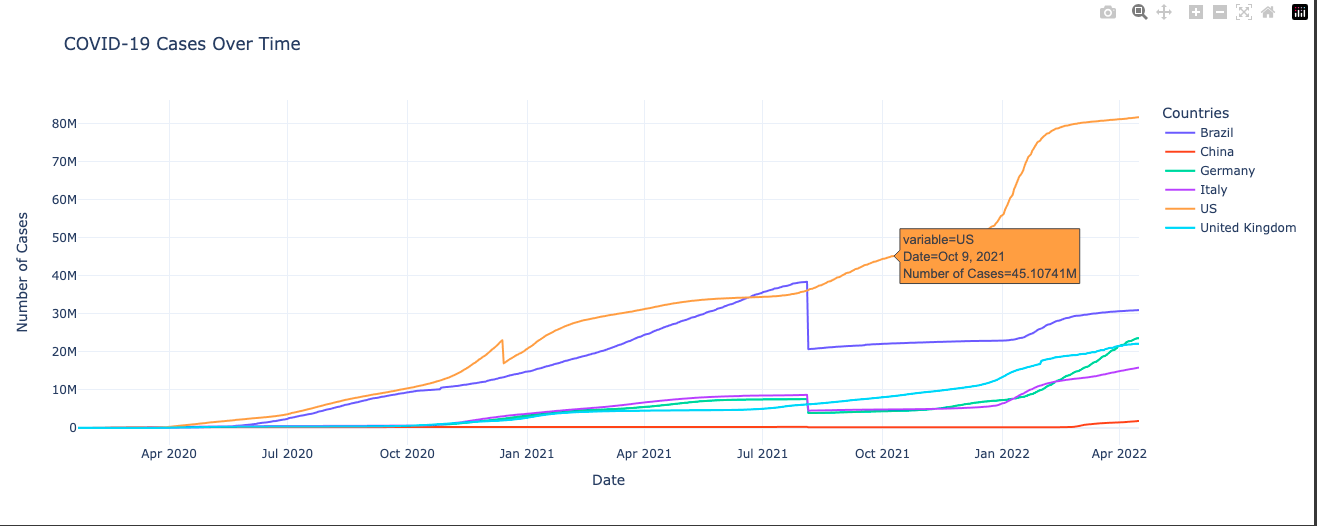

In [20]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import cumsum
from math import pi
import pandas as pd

output_notebook()

pie_data = {'Country': ['Germany', 'Italy', 'US'], 'Cases': [4969030, 5800684, 29815728]}
pie_df = pd.DataFrame(pie_data)

pie_df['angle'] = pie_df['Cases'] / pie_df['Cases'].sum() * 2 * pi
pie_df['color'] = ['#4C8BE2', '#00e061', '#FF8C00']

source = ColumnDataSource(pie_df)

p = figure(height=400, title="COVID-19 Cases Distribution", toolbar_location=None, tools="")

p.wedge(
    x=0, y=0, radius=0.4,
    start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
    line_color="white", fill_color='color', legend_field='Country',
    source=source
)

hover = HoverTool(tooltips=[("Country", "@Country"), ("Cases", "@Cases")])
p.add_tools(hover)

p.axis.visible = False
p.grid.visible = False

show(p)


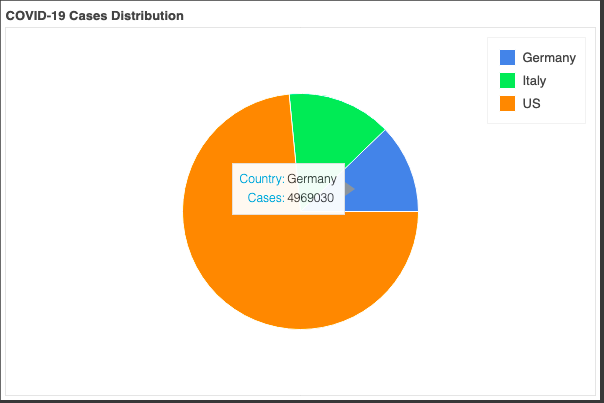